In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#VGG16 Classification

###Data 준비

In [2]:
!rm -rf imagenet
!mkdir imagenet

# 버섯
!wget -O imagenet/mushroom1.jpg http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
!wget -O imagenet/mushroom2.jpg http://farm3.static.flickr.com/2416/1593642808_efcef6c9c2.jpg
!wget -O imagenet/mushroom3.jpg http://farm4.static.flickr.com/3003/2536991564_5f9b2f5b53.jpg
  
# 강아지
!wget -O imagenet/dog1.jpg http://farm1.static.flickr.com/58/160964915_d708f48d0d.jpg
!wget -O imagenet/dog2.jpg http://farm1.static.flickr.com/51/144906086_049df05364.jpg
!wget -O imagenet/dog3.jpg http://farm3.static.flickr.com/2133/2236535445_ca650757f2.jpg
  
# 고양이  
!wget -O imagenet/cat1.jpg http://farm1.static.flickr.com/131/393656824_bd89c512d0.jpg
!wget -O imagenet/cat2.jpg http://farm1.static.flickr.com/213/505539125_d7193beb76.jpg
!wget -O imagenet/cat3.jpg http://farm1.static.flickr.com/24/63785988_c16c10b4e5.jpg

--2020-08-12 12:59:58--  http://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 52.222.142.95, 2600:9000:2204:f400:0:5a51:64c9:c681, 2600:9000:2204:7c00:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.222.142.95|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg [following]
--2020-08-12 12:59:58--  https://farm4.static.flickr.com/3023/2822584107_186167ff68.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|52.222.142.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘imagenet/mushroom1.jpg’

imagenet/mushroom1.     [ <=>                ]  59.95K  --.-KB/s    in 0.01s   

2020-08-12 12:59:58 (5.55 MB/s) - ‘imagenet/mushroom1.jpg’ saved [61385]

--2020-08-12 12:59:59--  http://farm3.static.flickr.com

###예측을 위한 함수 선언

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def predict_vgg16(model, filename) :

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)
  
  # 화면에 이미지 보여주기
  plt.imshow(image.astype(int))
  plt.show()

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))    

###분류실행

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112

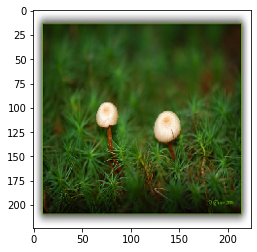

40960/35363 [==================================] - 0s 0us/step
acorn (33.85%)


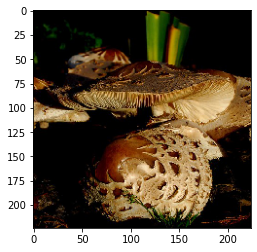

mushroom (71.36%)


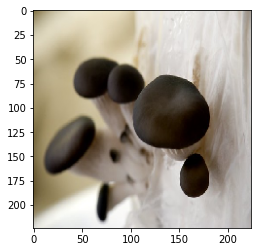

birdhouse (23.66%)


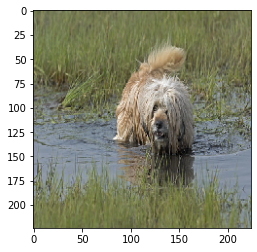

Tibetan_terrier (81.25%)


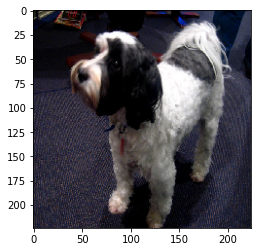

Tibetan_terrier (86.20%)


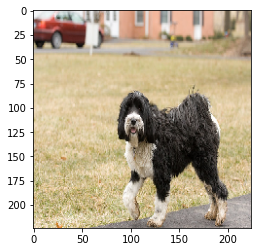

standard_poodle (23.32%)


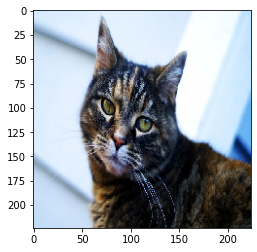

tabby (56.47%)


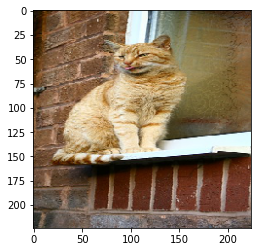

tiger_cat (39.95%)


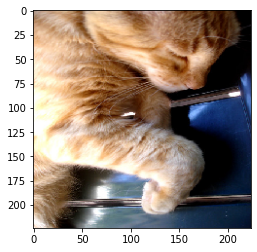

tiger_cat (18.94%)


In [5]:
from tensorflow.keras.applications import vgg16

# VGG16 모델 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

# 테스트 할 이미지 파일들
files = [
      'imagenet/mushroom1.jpg',
      'imagenet/mushroom2.jpg',
      'imagenet/mushroom3.jpg',
      'imagenet/dog1.jpg',
      'imagenet/dog2.jpg',
      'imagenet/dog3.jpg',
      'imagenet/cat1.jpg',
      'imagenet/cat2.jpg',
      'imagenet/cat3.jpg',
    ]

# 분류 실행
for file in files :
  predict_vgg16(model, file)  

#커스텀 데이터 학습

다운로드 데이터 출처: http://vision.stanford.edu/aditya86/ImageNetDogs

<br>

데이터는 다음과 같이 구성됨

```
dogs/
    class1/
        file1.jpg
        file2.jpg
         ...
    class2/ 
        file21.jpg
        file22.jpg
         ...    
    class3/
        file31.jpg
        file32.jpg
         ...
    ...

```

###커스텀 데이터 다운로드

In [6]:
!rm -rf dogs.tar.gz
!wget https://github.com/dhrim/wiset_2020_06/raw/master/material/deep_learning/dogs.tar.gz
!ls -al 

--2020-08-12 13:01:21--  https://github.com/dhrim/wiset_2020_06/raw/master/material/deep_learning/dogs.tar.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/wiset_2020_06/master/material/deep_learning/dogs.tar.gz [following]
--2020-08-12 13:01:21--  https://raw.githubusercontent.com/dhrim/wiset_2020_06/master/material/deep_learning/dogs.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62885106 (60M) [application/octet-stream]
Saving to: ‘dogs.tar.gz’

dogs.tar.gz         100%[===================>]  59.97M   171MB/s    in 0.4s    

2020-08-12 13:01:23 (171 MB/s) - ‘dogs.tar.gz’ saved [628

In [7]:
!rm -rf dogs
!tar xvfz dogs.tar.gz
!ls -al dogs

dogs/
dogs/n02085620-Chihuahua/
dogs/n02085782-Japanese_spaniel/
dogs/n02085936-Maltese_dog/
dogs/n02086079-Pekinese/
dogs/n02086240-Shih-Tzu/
dogs/n02086646-Blenheim_spaniel/
dogs/n02086910-papillon/
dogs/n02087046-toy_terrier/
dogs/n02087394-Rhodesian_ridgeback/
dogs/n02088094-Afghan_hound/
dogs/n02088094-Afghan_hound/n02088094_1003.jpg
dogs/n02088094-Afghan_hound/n02088094_1007.jpg
dogs/n02088094-Afghan_hound/n02088094_1023.jpg
dogs/n02088094-Afghan_hound/n02088094_10263.jpg
dogs/n02088094-Afghan_hound/n02088094_10715.jpg
dogs/n02088094-Afghan_hound/n02088094_10822.jpg
dogs/n02088094-Afghan_hound/n02088094_10832.jpg
dogs/n02088094-Afghan_hound/n02088094_10982.jpg
dogs/n02088094-Afghan_hound/n02088094_11006.jpg
dogs/n02088094-Afghan_hound/n02088094_11172.jpg
dogs/n02088094-Afghan_hound/n02088094_11182.jpg
dogs/n02088094-Afghan_hound/n02088094_1126.jpg
dogs/n02088094-Afghan_hound/n02088094_1128.jpg
dogs/n02088094-Afghan_hound/n02088094_11432.jpg
dogs/n02088094-Afghan_hound/n02088094_1

###데이터 로딩 함수 정의

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16

In [9]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [10]:
(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(custom_labels)  

(1535, 224, 224, 3)
(1535,)
(384, 224, 224, 3)
(384,)
['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound']


###기존 학습모델 파일 삭제

In [11]:
vgg16_model_path = 'new_trained_from_vgg16.h5'
!rm -rf {vgg16_model_path}

모델 구조 정의

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from tensorflow.keras.applications import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델
model.summary()

model.save(vgg16_model_path)

58892288/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [13]:
from tensorflow.keras.models import load_model

model = load_model(vgg16_model_path)

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

# 모델 학습
model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True, validation_split=0.1)

model.save(vgg16_model_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1381 samples, validate on 154 samples
Epoch 1/10
1381/1381 [==============================] - 7s 5ms/sample - loss: 128.4117 - acc: 0.6126 - val_loss: 33.9556 - val_acc: 0.6039
Epoch 2/10
1381/1381 [==============================] - 5s 3ms/sample - loss: 10.5316 - acc: 0.8870 - val_loss: 92.3457 - val_acc: 0.2338
Epoch 3/10
1381/1381 [==============================] - 5s 3ms/sample - loss: 5.9060 - acc: 0.9334 - val_loss: 31.1990 - val_acc: 0.5390
Epoch 4/10
1381/1381 [==============================] - 5s 3ms/sample - loss: 4.8231 - acc: 0.9464 - val_loss: 30.5344 - val_acc: 0.5909
Epoch 5/10
1381/1381 [==============================] - 5s 3ms/sample - loss: 5.1256 - acc: 0.9479 - val_loss: 35.1030 - val_acc: 0.6104
Epoch 6/10
1381/1381 [=======

###결과 확인

384/384 [==============================] - 2s 5ms/sample - loss: 1149.9033 - acc: 0.0234
loss = 1149.903325398763
acc = 0.0234375
2 n02085936-Maltese_dog
2 n02085936-Maltese_dog


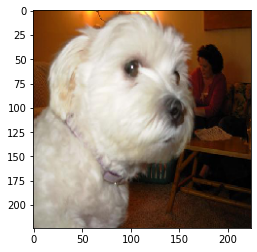

6 n02086910-papillon
5 n02086646-Blenheim_spaniel


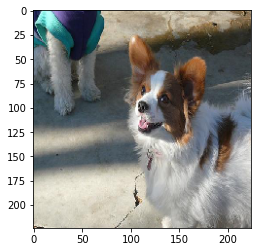

6 n02086910-papillon
5 n02086646-Blenheim_spaniel


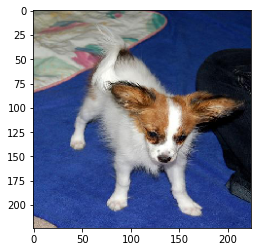

6 n02086910-papillon
4 n02086240-Shih-Tzu


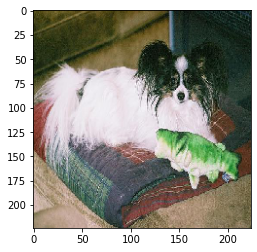

6 n02086910-papillon
1 n02085782-Japanese_spaniel


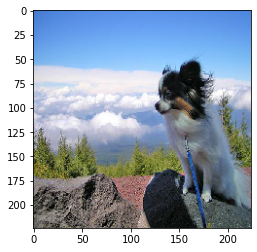

In [14]:
import matplotlib.pyplot as plt

loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)

predicted = np.argmax(y_, axis=1)


# train_x, test_x는 vgg16.prerprocess_input()에 의해 변형되었다.
(_, _), (raw_test_x, _), custom_labels = load_custom_data("dogs")


for i in [0,50,100,150,200]:  
  print(test_y[i], custom_labels[test_y[i]])
  print(predicted[i], custom_labels[predicted[i]])
  plt.imshow(raw_test_x[i].astype(int))
  plt.show()


#VGG16 커스텀 학습 최소 코드

In [15]:
def load_file_names_and_category_names(path):
  
  file_names = []
  category_names = []

  dir_names = os.listdir(path)
      
  for dir_name in dir_names:
    file_names_in_a_dir = os.listdir(path+"/"+dir_name)

    for a_file_name in file_names_in_a_dir:
      full_file_name = path+"/"+dir_name+"/"+a_file_name
      file_names.append(full_file_name)
      category_names.append(dir_name)

  return file_names, category_names


def load_image_files_into_numpy_array(file_names):
  file_count = len(file_names)    
  data = np.ndarray(shape=(file_count,224,224,3), dtype=np.float64)    
  for i in range(len(file_names)):
    image = load_img(file_names[i], target_size=(224, 224))
    image = img_to_array(image)
    data[i] = image
  return data


def load_custom_data(path, train_ratio=0.8):
  
  file_names, category_names = load_file_names_and_category_names(path)
  x = load_image_files_into_numpy_array(file_names)
  
  labels, y = np.unique(category_names, return_inverse=True)  

  s = int(x.shape[0]*train_ratio)
  train_x, test_x = x[:s], x[s:]
  train_y, test_y = y[:s], y[s:]
  
  return (train_x, train_y), (test_x, test_y), labels

In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)


model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

Train on 1535 samples
Epoch 1/10
1535/1535 [==============================] - 6s 4ms/sample - loss: 120.9313 - acc: 0.6339
Epoch 2/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 9.4126 - acc: 0.8938
Epoch 3/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 7.5659 - acc: 0.9153
Epoch 4/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 4.9799 - acc: 0.9459
Epoch 5/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 3.6642 - acc: 0.9570
Epoch 6/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 4.0357 - acc: 0.9550
Epoch 7/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 3.4306 - acc: 0.9570
Epoch 8/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 3.8990 - acc: 0.9655
Epoch 9/10
1535/1535 [==============================] - 5s 3ms/sample - loss: 3.1103 - acc: 0.9674
Epoch 10/10
384/384 [==============================] - 1s 3ms/sample - loss: 1103.329

###커스텀 학습을 위한 데이터 증강

In [17]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16



conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


(train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input # 여기에 preprocess 함수를 설정
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
    data_aug_generator.flow(train_x, train_y, batch_size=64),
    steps_per_epoch=train_x.shape[0]/64, # data_size / batch_size
    epochs=10)


loss, acc = model.evaluate(test_x, test_y)
print("loss =",loss)
print("acc =",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])


Epoch 1/10
24/23 [==============================] - 15s 633ms/step - loss: 134.7933 - acc: 0.5779
Epoch 2/10
24/23 [==============================] - 15s 614ms/step - loss: 10.0289 - acc: 0.8352
Epoch 3/10
24/23 [==============================] - 15s 616ms/step - loss: 8.1553 - acc: 0.8339
Epoch 4/10
24/23 [==============================] - 15s 617ms/step - loss: 5.0681 - acc: 0.8691
Epoch 5/10
24/23 [==============================] - 15s 617ms/step - loss: 4.9607 - acc: 0.8580
Epoch 6/10
24/23 [==============================] - 15s 619ms/step - loss: 2.8592 - acc: 0.9010
Epoch 7/10
24/23 [==============================] - 15s 617ms/step - loss: 3.3032 - acc: 0.8899
Epoch 8/10
24/23 [==============================] - 15s 619ms/step - loss: 3.5777 - acc: 0.9010
Epoch 9/10
24/23 [==============================] - 15s 620ms/step - loss: 2.7710 - acc: 0.9121
Epoch 10/10
384/384 [==============================] - 1s 4ms/sample - loss: 267.8785 - acc: 0.0339
loss = 267.8784764607747
acc = 0.

###디렉토리 구조를 사용한 커스텀 학습

데이터는 다음과 같이 구성됨

```
dogs/
    train/
        class1/
            file1.jpg
            file2.jpg
             ...
        class2/ 
            file21.jpg
            file22.jpg
             ...    
        class3/
            file31.jpg
            file32.jpg
             ...
        ...
    test/
        class1/
            file8.jpg
            file9.jpg
             ...
        class2/ 
            file28.jpg
            file29.jpg
             ...    
        class3/
            file38.jpg
            file39.jpg
             ...
        ...
    
```

###커스텀 데이터 다운로드

In [18]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/wiset_2020_06/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al  

--2020-08-12 13:20:51--  https://github.com/dhrim/wiset_2020_06/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/wiset_2020_06/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2020-08-12 13:20:51--  https://raw.githubusercontent.com/dhrim/wiset_2020_06/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   155MB/s    in 0.4s    

2020-08-12 13:20:53 (

In [19]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

###디렉토리로 준비된 데이터로 커스텀 학습

In [20]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


# (train_x, train_y), (test_x, test_y), custom_labels = load_custom_data("dogs")

# train_x = vgg16.preprocess_input(train_x)
# test_x = vgg16.preprocess_input(test_x)

# ADD START
data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)
# ADD END
 

#model.fit(train_x, train_y, epochs=10, batch_size=64, shuffle=True)
model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64, # data_size / batch_size    
      epochs=10
)


# y_ = model.predict(test_x)
y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys()) # ADDED
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 21s 878ms/step - loss: 119.7313 - acc: 0.5369 - val_loss: 6.6412 - val_acc: 0.8687
Epoch 2/10
24/23 [==============================] - 19s 811ms/step - loss: 9.8348 - acc: 0.7923 - val_loss: 9.3506 - val_acc: 0.7688
Epoch 3/10
24/23 [==============================] - 19s 801ms/step - loss: 7.8977 - acc: 0.7962 - val_loss: 3.9118 - val_acc: 0.8750
Epoch 4/10
24/23 [==============================] - 19s 812ms/step - loss: 5.4555 - acc: 0.8367 - val_loss: 4.7817 - val_acc: 0.8750
Epoch 5/10
24/23 [==============================] - 19s 812ms/step - loss: 4.8419 - acc: 0.8328 - val_loss: 3.8323 - val_acc: 0.8750
Epoch 6/10
24/23 [==============================] - 22s 936ms/step - loss: 5.2825 - acc: 0.8452 - val_loss: 5.0540 - val_acc: 0.8500
Epoch 7/10
24/23 [==============================] - 23s 950ms/step - loss: 4.4838 - acc: 0.8694 - val_loss: 4.3674 

###디렉토리 구조 데이터의 학습 최소 코드

In [21]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16


conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=vgg16.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
      preprocessing_function=vgg16.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64,
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 22s 911ms/step - loss: 96.8124 - acc: 0.5702 - val_loss: 7.7674 - val_acc: 0.8062
Epoch 2/10
24/23 [==============================] - 19s 810ms/step - loss: 13.7077 - acc: 0.7747 - val_loss: 12.0481 - val_acc: 0.8062
Epoch 3/10
24/23 [==============================] - 21s 863ms/step - loss: 9.4126 - acc: 0.8152 - val_loss: 5.6412 - val_acc: 0.8687
Epoch 4/10
24/23 [==============================] - 20s 823ms/step - loss: 7.3247 - acc: 0.8256 - val_loss: 6.4129 - val_acc: 0.8562
Epoch 5/10
24/23 [==============================] - 20s 817ms/step - loss: 6.7736 - acc: 0.8511 - val_loss: 4.5103 - val_acc: 0.8687
Epoch 6/10
24/23 [==============================] - 20s 846ms/step - loss: 5.0264 - acc: 0.8687 - val_loss: 5.1017 - val_acc: 0.8562
Epoch 7/10
24/23 [==============================] - 20s 854ms/step - loss: 5.2259 - acc: 0.8687 - val_loss: 6.6751

#ResNet으로 전이학습

In [22]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50
from tensorflow.keras.applications import ResNet50


# conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])


data_aug_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
)

data_no_aug_generator = ImageDataGenerator(
#       preprocessing_function=vgg16.preprocess_input
      preprocessing_function=resnet50.preprocess_input
)

train_data_generator = data_aug_generator.flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=64,
      class_mode='sparse'
)

test_data_generator = data_no_aug_generator.flow_from_directory(
      "dogs_prepared/test",
      target_size=(224,224),
      class_mode='sparse'
)


model.fit_generator(
      train_data_generator,
      validation_data=test_data_generator,
      validation_steps=5,
      steps_per_epoch=train_data_generator.samples/64,
      epochs=10
)


y_ = model.predict_generator(
      test_data_generator,
      steps=test_data_generator.samples/64
)

custom_labels = list(test_data_generator.class_indices.keys())
predicted = np.argmax(y_, axis=1)
print(predicted[0], custom_labels[predicted[0]])

94773248/94765736 [==============================] - 3s 0us/step
Found 1531 images belonging to 10 classes.
Found 388 images belonging to 10 classes.
Epoch 1/10
24/23 [==============================] - 23s 963ms/step - loss: 59.4943 - acc: 0.5460 - val_loss: 3.3885 - val_acc: 0.8687
Epoch 2/10
24/23 [==============================] - 19s 778ms/step - loss: 4.0957 - acc: 0.8054 - val_loss: 2.4701 - val_acc: 0.8625
Epoch 3/10
24/23 [==============================] - 19s 807ms/step - loss: 2.7358 - acc: 0.8040 - val_loss: 1.0696 - val_acc: 0.9125
Epoch 4/10
24/23 [==============================] - 19s 809ms/step - loss: 1.9571 - acc: 0.8426 - val_loss: 2.1650 - val_acc: 0.8313
Epoch 5/10
24/23 [==============================] - 19s 804ms/step - loss: 1.8749 - acc: 0.8472 - val_loss: 3.1495 - val_acc: 0.8813
Epoch 6/10
24/23 [==============================] - 19s 811ms/step - loss: 1.5023 - acc: 0.8779 - val_loss: 2.6948 - val_acc: 0.8562
Epoch 7/10
24/23 [==============================] -